# Naive Bayes
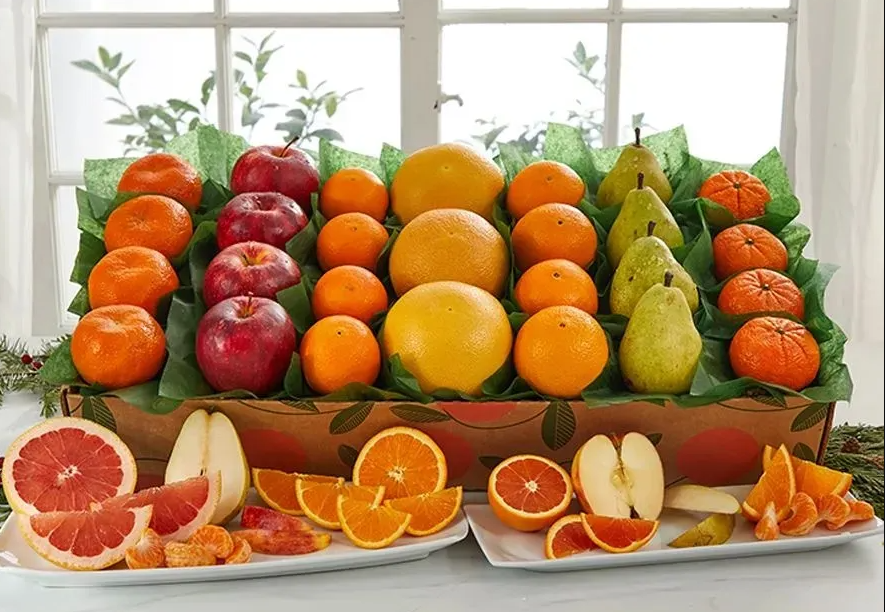
### We have a large number of fruits of 5 types (apple, lemon, mango, orange, tangerine), and we have assigned them 3 attributes including color, size, and flavor. Each attribute has 3 values (color=red, green, yellow; size=small, medium, large; flavor=sweet, sour, bitter). 
### The problem is determining what type of fruit is a given fruit with known attributes (e.g. color=green, size=medium, flavor=sweet).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generating Data
### Since I had no access to real data, I generated it by random variables. We have 5 categories (5 types of fruits), with three attributes (color, size, flavor). Each attribute has 3 values (e.g. color=red, green, yellow).

In [2]:
N_items = 1000
N_cat = 5             # No. of categories
N_attr = 3            # No. of attributes
N_val = 3             # No. of values

F = np.vstack([np.random.randint(0, N_cat, (N_items)), np.random.randint(0, N_val, (N_attr, N_items))])    
F

array([[3, 4, 3, ..., 3, 4, 3],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 2, ..., 2, 1, 0],
       [2, 2, 0, ..., 2, 0, 2]])

#### Converting numbers to strings

In [3]:
name = F[:1]
name = name.astype(str)
name[name=='0'] = 'apple'
name[name=='1'] = 'orange'
name[name=='2'] = 'tangerine'
name[name=='3'] = 'lemon'
name[name=='4'] = 'mango'

color = F[1:2]
color = color.astype(str)
color[color=='0'] = 'red'
color[color=='1'] = 'green'
color[color=='2'] = 'yellow'

size = F[2:3]
size = size.astype(str)
size[size=='0'] = 'small'
size[size=='1'] = 'medium'
size[size=='2'] = 'large'

flavor = F[3:]
flavor = flavor.astype(str)
flavor[flavor=='0'] = 'sweet'
flavor[flavor=='1'] = 'sour'
flavor[flavor=='2'] = 'bitter'

In [4]:
data = np.vstack([name, color, size, flavor])
data

array([['lemon', 'mango', 'lemon', ..., 'lemon', 'mango', 'lemon'],
       ['red', 'red', 'red', ..., 'red', 'red', 'red'],
       ['medium', 'medium', 'large', ..., 'large', 'medium', 'small'],
       ['bitter', 'bitter', 'sweet', ..., 'bitter', 'sweet', 'bitter']],
      dtype='<U11')

In [5]:
np.savetxt('mydata.csv', data, fmt='%s', delimiter=',')      # Save data to a csv file

## Importing data
### If there is already a data sheet as a csv file, we can skip the above steps and start from here.

In [6]:
in_data = np.loadtxt('mydata.csv', dtype='object', delimiter=',', unpack=False)
names = in_data[:1].ravel()
attributes = in_data[1:]
colors, sizes, flavors = attributes
N_items = len(names)
N_items

1000

### Finding probabilities

In [7]:
fruits, no_fruits = np.unique(names, return_counts=True)
color_cat, no_colors = np.unique(colors, return_counts=True)
size_cat, no_sizes = np.unique(sizes, return_counts=True)
flavor_cat, no_flavors = np.unique(flavors, return_counts=True)

prob_fruits = no_fruits / N_items
prob_colors = no_colors / N_items
prob_sizes = no_sizes / N_items
prob_flavors = no_flavors / N_items

## Test
### We are ready to find the probability of a category based on the naive bayes formula
###  $P(y|x_1x_2x_3)=\frac{P(x_1x_2x_3|y)P(y)}{P(x_1x_2x_3)}$
### where $y$ is the fruit, and $x_1$, $x_2$ and $x_3$ are its attributes (color, size, and flavor).

### Suppose given a fruit with attributes (green, medium, sweet), what are the probabilities of being any fruits?

In [8]:
attr1 = 'green'
attr2 = 'medium'
attr3 = 'sweet'

In [19]:
def cond_count(names, fruits, colors, attr1 = 'green'):           # This function counts number of attr1 in each fruits
    n_color_fruit = np.empty([N_cat])
    for i in range(len(fruits)):
        arr = colors[names == fruits[i:i+1]]
        n_color_fruit[i] = (arr == attr1 ).sum()
        
    return n_color_fruit

In [13]:
P_x1 = prob_colors[color_cat==attr1].item()               # Finding the probability of color being attr1
P_x2 = prob_sizes[size_cat==attr2].item()                 # Finding the probability of size being attr2
P_x3 = prob_flavors[flavor_cat==attr3].item()             # Finding the probability of flavor being attr3


n_color_fruit = cond_count(names, fruits, colors, attr1)
n_size_fruit = cond_count(names, fruits, sizes, attr2)
n_flavor_fruit = cond_count(names, fruits, flavors, attr3)

p_x1_y = n_color_fruit / no_fruits                            # The conditional probability P(color=attr1 given each fruits)
p_x2_y = n_size_fruit / no_fruits                             # The conditional probability P(size=attr2 given each fruits)
p_x3_y = n_flavor_fruit / no_fruits                           # The conditional probability P(flavor=attr3 given each fruits)


In [20]:
p_y_x1x2x3 = (p_x1_y * p_x2_y * p_x3_y * prob_fruits)/(P_x1*P_x2*P_x3)           #  Bayes formula
fruits, p_y_x1x2x3

(array(['apple', 'lemon', 'mango', 'orange', 'tangerine'], dtype=object),
 array([0.20401553, 0.20033414, 0.19086597, 0.21603006, 0.18471688]))

In [21]:
sum(p_y_x1x2x3)

0.9959625733667152

### Result: The highest probability shows that the given fruit is most likely to be which type of fruit.

In [22]:
fruits[p_y_x1x2x3==np.max(p_y_x1x2x3)].item()                   # The fruit corresponding to the highest probability

'orange'

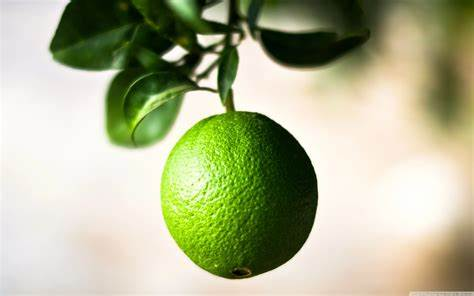